<a href="https://colab.research.google.com/github/Sulthana-2000/Machine-Learning-Regression-Models/blob/main/Simple_Linear_Regression(Salary_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

````````
Simple Linear Regression Model

Only contains:
*   One dependent Variable
*   One independent variable



Text(0.5, 1.0, 'Area-Price Graph')

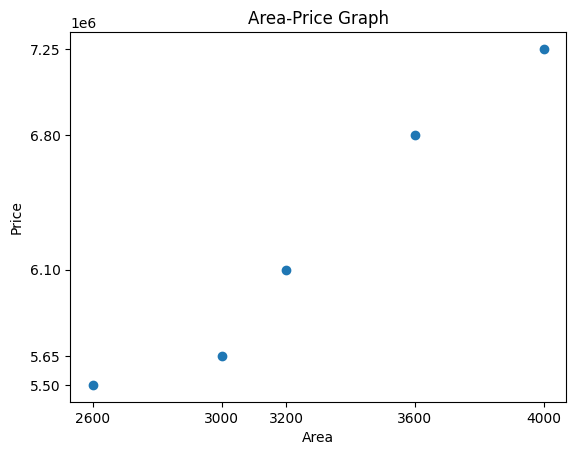

In [ ]:
import matplotlib.pyplot as plt
x=[2600,3000,3200,3600,4000]
y=[5500000,5650000,6100000,6800000,7250000]
plt.scatter(x,y)
plt.xlabel('Area')
plt.xticks(x)
plt.ylabel('Price')
plt.yticks(y)
plt.title('Area-Price Graph')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
df.shape

(30, 2)

Text(0.5, 1.0, 'Salary Data')

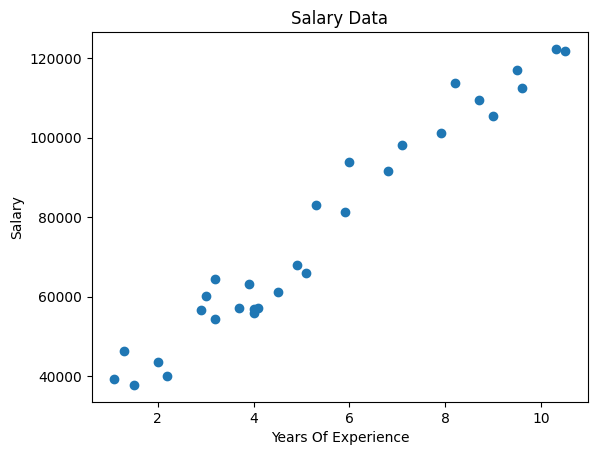

In [ ]:
x=df['YearsExperience'].tolist()
y=df['Salary'].tolist()
plt.scatter(x,y)
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.title('Salary Data')

In [ ]:
x=df.iloc[:,:-1] # in regression model we don't have to change x and y into values which makes difficulties when converting into a dataframe
y=df.iloc[:,-1] # we dont want the data in array model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
# model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [ ]:
y_test # here we can see the errors in actual value-predcited value by machine

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64

In [ ]:
x_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7
28,10.3
24,8.7
12,4.0


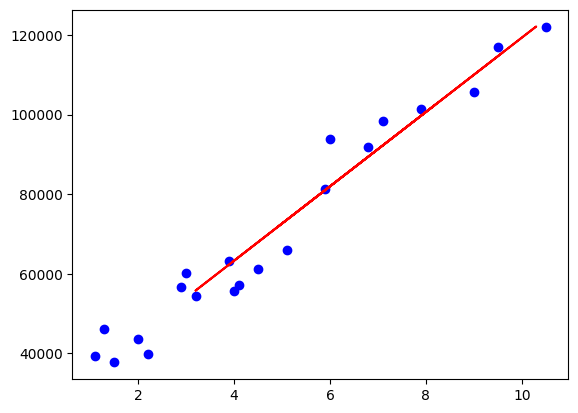

In [ ]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_test,y_pred,color='red') # y=mx+c

In [ ]:
print(model.predict([[8.5]]))

[105300.63298732]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# y=mx+c (m=slope , x=value need to be predicted , c=y intercept on x)

#Slope
print('Slope is',model.coef_)
# Intercept
print('Intercept is',model.intercept_)

# 4.2=====> y=9339.081 * 4.2 + 25918.438 = 65142.567

Slope is [9339.08172382]
Intercept is 25918.438334893202


In [ ]:
print(model.predict([[4.2]]))

[65142.58157492]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
27,112635.0,115573.622884,-2938.622884
15,67938.0,71679.938782,-3741.938782
23,113812.0,102498.908470,11313.091530
17,83088.0,75415.571471,7672.428529
8,64445.0,55803.499851,8641.500149
9,57189.0,60473.040713,-3284.040713
28,122391.0,122110.980090,280.019910
24,109431.0,107168.449332,2262.550668
12,56957.0,63274.765230,-6317.765230


In [ ]:
# performance evaluation
from sklearn.metrics import mean_absolute_error
print('Error is ',mean_absolute_error(y_test,y_pred))

Error is  5161.328710400183


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('Percentage Error is ',mean_absolute_percentage_error(y_test,y_pred)) # the value can go upto 0.3

Percentage Error is  0.06647907533756252


In [ ]:
from sklearn.metrics import mean_squared_error
print('Squared Error is ',mean_squared_error(y_test,y_pred))

Squared Error is  37784662.46621314


In [ ]:
# for finding root mean squared error there is no specific fn so that we find the it using sqrt in numpy
data=mean_squared_error(y_test,y_pred)
data

37784662.46621314

In [ ]:
sq=np.sqrt(data)
sq

6146.92300799458

In [ ]:
from sklearn.metrics import r2_score # coefficient of deremination
print('R2 score is ',r2_score(y_test,y_pred)) # it's a perfect model

R2 score is  0.9414466227178214
